<a href="https://colab.research.google.com/github/eduardocarbo/gh-react/blob/main/Modulo_7_Modelos_de_reducci%C3%B3n_de_dimensiones_ACP_EAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos de reducción de dimensiones ACP

##<font color='blue'>Introducción</font>

*   Cuando se tiene un dataset de alta dimensión (cantidad de columnas >10), lo que primero se suele realizar es una exploración visual de los datos. 
*   Sin embargo, cuando hay demasiadas dimensiones los enfoques clásicos se quedan cortos
*   Existen técnicas de visualización diseñadas específicamente para los datos de alta dimensión, que se presentarán en este modulo. 
*   A veces muchas características contienen poca información porque no muestran ninguna varianza o porque son duplicados de otras características. 
*   Vamos a detectar estas características y a eliminarlas del conjunto de datos para poder centrarnos en las más relevantes.  
*  Este proceso de eliminar características irrelevantes, para reducir la dimensionalidad se hace mediante el cálculo de componentes principales no correlacionados.


###Algo más sobre el método .describe()

Pueden obtenerse estadísticas de resumen para datos no numéricos usando el argumento ```exclude='number'```



**Ejercicio 1:** Cargue el archivo pokemon.xlsx y importe las librerías pandas 
con el alias pd y explore la data.



*   ¿Cuántas características (variables) tiene el dataset?




In [2]:
from google.colab import files
uploaded = files.upload()

Saving pokemon_df.xlsx to pokemon_df.xlsx


In [3]:
import pandas as pd
df = pd.read_excel("pokemon_df.xlsx")

import numpy as np

In [4]:
df.describe()

,Unnamed: 0,HP,Attack,Defense,Generation
count,160.000000,160.00000,160.00000,160.000000,160.0
mean,79.500000,64.61250,74.98125,70.175000,1.0
std,46.332134,27.92127,29.18009,28.883533,0.0
min,0.000000,10.00000,5.00000,5.000000,1.0
25%,39.750000,45.00000,52.00000,50.000000,1.0
50%,79.500000,60.00000,71.00000,65.000000,1.0
75%,119.250000,80.00000,95.00000,85.000000,1.0
max,159.000000,250.00000,155.00000,180.000000,1.0


In [5]:
columnas_numericas=["HP","Attack","Defense"]#se borra generation proque no aporta nada . su variacion estandar es 0
df.describe()

,Unnamed: 0,HP,Attack,Defense,Generation
count,160.000000,160.00000,160.00000,160.000000,160.0
mean,79.500000,64.61250,74.98125,70.175000,1.0
std,46.332134,27.92127,29.18009,28.883533,0.0
min,0.000000,10.00000,5.00000,5.000000,1.0
25%,39.750000,45.00000,52.00000,50.000000,1.0
50%,79.500000,60.00000,71.00000,65.000000,1.0
75%,119.250000,80.00000,95.00000,85.000000,1.0
max,159.000000,250.00000,155.00000,180.000000,1.0


**Ejercicio 2:** Nombre la lista columnas_numericas con las caracerísticas: 'HP', 'Attack', 'Defense', 'HP', 'Attack', 'Generation' y utilice el método .describe() para encontrar la característica numérica sin varianza y eliminar su nombre de la lista asignada a numero_columnas


**Ejercicio 3:** Nombre la lista no_columnas_numericas que contenga las características no númericas de pokemon_df. Combine las dos listas con los nombres de características para sub-seleccionar las características elegidas de df. Para eso llame al nuevo dataframe como df_seleccion e imprima las primeras lineas del mismo 

In [6]:
df.head()

,Unnamed: 0,HP,Attack,Defense,Generation,Name,Type,Legendary
0,0,45,49,49,1,Bulbasaur,Grass,False
1,1,60,62,63,1,Ivysaur,Grass,False
2,2,80,82,83,1,Venusaur,Grass,False
3,3,80,100,123,1,VenusaurMega Venusaur,Grass,False
4,4,39,52,43,1,Charmander,Fire,False


In [7]:
#Bautizar nueva lista:
no_columnas_numericas = ["Name","Type","Legendary"]

In [8]:
#llamar el nuevo dataframe 
df_seleccion = df[columnas_numericas+no_columnas_numericas]

In [9]:
df_seleccion.head()

,HP,Attack,Defense,Name,Type,Legendary
0,45,49,49,Bulbasaur,Grass,False
1,60,62,63,Ivysaur,Grass,False
2,80,82,83,Venusaur,Grass,False
3,80,100,123,VenusaurMega Venusaur,Grass,False
4,39,52,43,Charmander,Fire,False


**Ejercicio 4:** Encuentre la característica no numérica sin variación y elimine su nombre de la lista asignada a no_columnas_numericas

In [10]:
df_seleccion.describe(exclude='number')

,Name,Type,Legendary
count,160,160,160
unique,160,15,1
top,Bulbasaur,Water,False
freq,1,31,160


In [11]:
no_columnas_numericas=["Name","Type"]

##<font color='blue'>Selección de características VS Extracción de características </font>

* Reducir la cantidad de dimensiones en su conjunto de datos tiene múltiples beneficios (el dataset se vuelve más simple, es más fácil manipularlo, menos espacio en disco, cálculos más rápidos, menos probabilidad de overfitting en el modelo)

* La forma más sencilla de reducir la dimensionalidad es seleccionar solo las características o columnas que son importantes para usted de un conjunto de datos  grande (difícil decidir qué características son importantes).

  * 
Recuerde el método pandas DataFrame ```.drop()```, puede eliminar una característica fácilmente. Asegúrese de pasar el argumento ```Axis=1```, para especificar que estamos soltando una columna en lugar de una fila.


* Pairplot() de Seaborn es excelente para explorar visualmente conjuntos de datos de tamaño pequeño a mediano. Proporciona una comparación uno por uno de cada característica numérica en el conjunto de datos en forma de diagrama de dispersión más, en la diagonal, una vista de la distribución de cada característica.

* **Selección de características:** 
Se elimina por completo una característica y la información que contiene del conjunto de dato. Se debe procurar minimizar la pérdida de información, eliminando únicamente las características que son irrelevantes o contienen poca información única (aunque algunas veces no se pueda)

* **Extracción de características:** 
En lugar de seleccionar un subconjunto de características de nuestro conjunto de datos inicial, calculamos o extraemos nuevas características de las originales. Las nuevas características tienen la menor cantidad posible de información redundante y, son menos numerosas. 
   * **Desventaja:** las nuevas características no son tan fáciles de entender que las originales.

* La dimensionalidad de los conjuntos de datos con muchas correlaciones fuertes entre las diferentes características, se puede reducir mucho con la extracción de características

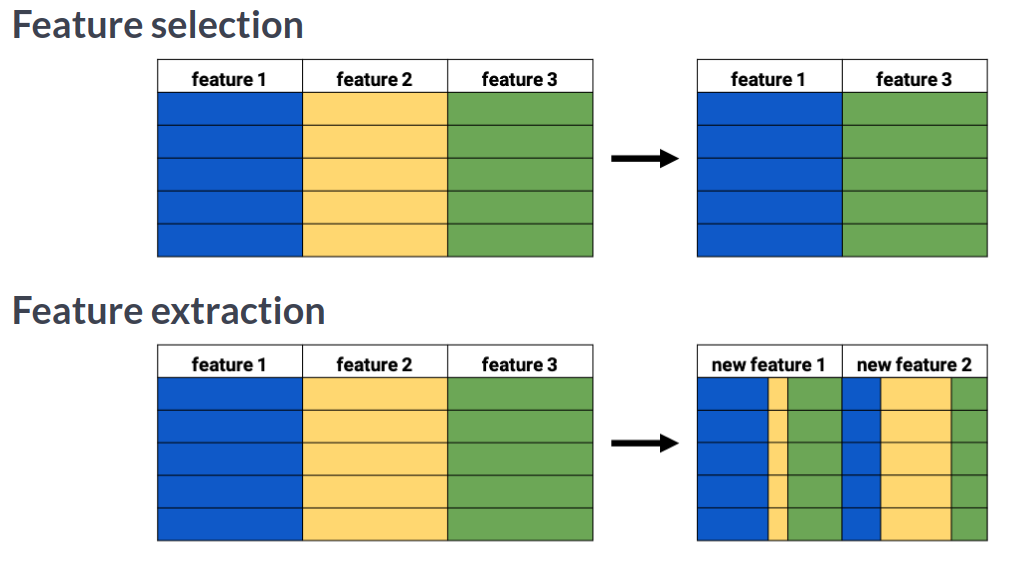


## Detección visual de características redundantes

Utilicemos Seaborn para explorar algunas muestras del conjunto de datos de mediciones corporales ANSUR del ejército estadounidense.

**Ejercicio 1:** Cargue los archivos ansur_df_1.xlsx y ansur_df_2.xlsx e importe las librerías pandas con el alias pd, matplotlib.pyplot con el alias plt y seaborn con el alias sns y explore la data.

In [12]:
from google.colab import files
uploaded = files.upload()

Saving ansur_df_2.xlsx to ansur_df_2.xlsx
Saving ansur_df_1.xlsx to ansur_df_1.xlsx


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_1 = pd.read_excel("ansur_df_1.xlsx")
df_2 = pd.read_excel("ansur_df_2.xlsx")

In [15]:
df_1.describe()

,weight_kg,stature_m,body_height
count,200.000000,200.000000,200.000000
mean,77.165000,1693.730000,66.682200
std,14.753212,89.873094,3.538176
min,47.100000,1446.000000,56.930000
25%,67.500000,1630.000000,64.170000
50%,74.300000,1684.500000,66.320000
75%,86.625000,1754.000000,69.060000
max,140.000000,1959.000000,77.130000


In [16]:
df_1.head(5)

,Gender,weight_kg,stature_m,body_height
0,Male,81.5,1776,69.92
1,Male,72.6,1702,67.01
2,Male,92.9,1735,68.31
3,Male,79.4,1655,65.16
4,Male,94.6,1914,75.35


In [17]:
df_2.describe()

,footlength,headlength,n_legs
count,200.000000,200.000000,200.0
mean,258.275000,194.385000,2.0
std,16.843035,8.795658,0.0
min,215.000000,176.000000,2.0
25%,247.000000,188.000000,2.0
50%,257.000000,194.000000,2.0
75%,269.000000,200.250000,2.0
max,305.000000,218.000000,2.0


In [18]:
df_2.head(5)

,Gender,footlength,headlength,n_legs
0,Male,273,206,2
1,Male,263,201,2
2,Male,270,202,2
3,Male,267,199,2
4,Male,305,197,2


**Ejercicio 2:** Cree un diagrama de pares o de parejas de la muestra de datos ansur_df_1 y coloree los puntos utilizando la característica "Gender".
Use la expresión ```sns.pairplot(df, hue="Gender", diag_kind='hist')```

**Nota:** El diagrama de pares permite ver rápidamente la relación cruzada entre todas las variables de un conjunto de datos(), en forma de diagrama de puntos. Las gráficas de la diagonal son la distribución de los datos de dicha variable. 


* Según el gráfico, ¿qué variables presentan "casi" una perfecta correlación?

<font color='blue'>Puede verificar dicha correlación usando el método .corr()</font>

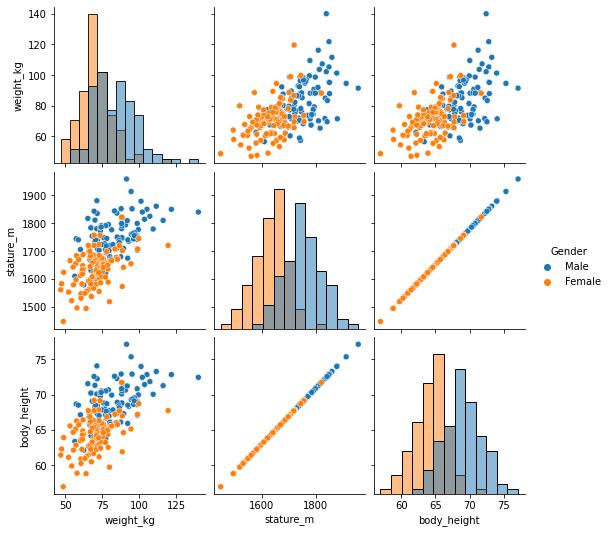

In [21]:
sns.pairplot(df_1, hue="Gender", diag_kind='hist')

In [22]:
df_1[["stature_m","body_height"]].corr()

,stature_m,body_height
stature_m,1.0,1.0
body_height,1.0,1.0


**Ejercicio 3:** Dos características son básicamente duplicadas, elimine una de ellas del conjunto de datos.

In [23]:
df_1_reducido=df_1.drop("stature_m",axis=1)

In [24]:
df_1_reducido

,Gender,weight_kg,body_height
0,Male,81.5,69.92
1,Male,72.6,67.01
2,Male,92.9,68.31
3,Male,79.4,65.16
4,Male,94.6,75.35
...,...,...,...
195,Female,58.1,58.86
196,Female,64.2,58.78
197,Female,75.8,64.61
198,Female,68.3,63.27


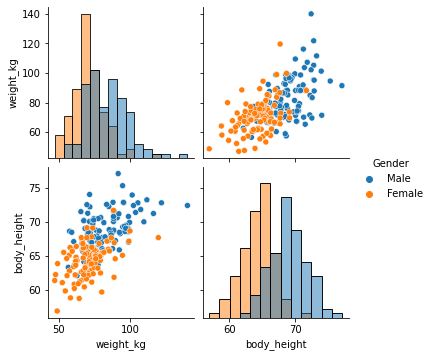

In [25]:
sns.pairplot(df_1_reducido, hue="Gender", diag_kind='hist')

In [26]:
df_1_reducido.head(5)

,Gender,weight_kg,body_height
0,Male,81.5,69.92
1,Male,72.6,67.01
2,Male,92.9,68.31
3,Male,79.4,65.16
4,Male,94.6,75.35


In [27]:
df_1_generom=df_1_reducido[df_1_reducido["Gender"]=="Male"]


In [28]:
df_1_reducido.head(5)

,Gender,weight_kg,body_height
0,Male,81.5,69.92
1,Male,72.6,67.01
2,Male,92.9,68.31
3,Male,79.4,65.16
4,Male,94.6,75.35


In [29]:
df_1_generom.describe()

,weight_kg,body_height
count,100.000000,100.000000
mean,83.858000,69.055900
std,14.573777,2.769261
min,56.600000,62.130000
25%,72.700000,67.120000
50%,81.900000,68.860000
75%,93.325000,70.830000
max,140.000000,77.130000


**Ejercicio 4:** Cree un diagrama de parejas o de pares de la muestra de datos ansur_df_2 y coloree los puntos usando la característica 'Gender' 

**Ejercicio 5:** Una característica no tiene varianza, elimínela del conjunto de datos.



## Visualización t-SNE de datos de alta dimensión 

* Vamos a aplicar la t-Distributed Stochastic Neighbor Embedding o t-SNE. Es una técnica para visualizar datos de alta dimensión mediante la extracción de características. *No funciona con datos no numéricos*

**Definición t-SNE (T-distributed Stochastic Neighbor Embedding):** es un algoritmo de aprendizaje automático para la visualización de datos. Los gráficos t-SNE modelan cada objeto de alta dimensionalidad por un punto de 2 o 3 dimensiones de manera que los objetos similares se modelan por puntos cercanos y los objetos dispares se modelan por puntos distantes con alta probabilidad.

**En castellano 😅​:**t-SNE maximizará la distancia en el espacio bidimensional entre las observaciones que son más diferentes en un espacio de alta dimensión. Debido a esto, las observaciones que son similares estarán cerca unas de otras y pueden agruparse




**Ejercicio 1:** Cargue los archivos ANSUR_II_FEMALE.csv y ANSUR_II_MALE.csv

In [30]:
from google.colab import files
uploaded = files.upload()

Saving ANSUR_II_MALE.csv to ANSUR_II_MALE.csv
Saving ANSUR_II_FEMALE.csv to ANSUR_II_FEMALE.csv


,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,...,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,...,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,...,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


**Ejercicio 2:** Nombre los dataframe como ansur_male, y ansur_female respectivamente. Imprima un encabezado de los mismos

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ansur_female = pd.read_csv("ANSUR_II_FEMALE.csv")
ansur_male= pd.read_csv("ANSUR_II_MALE.csv")

In [62]:
ansur_male.head(5)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [63]:
ansur_female.head(5)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,...,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,...,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,...,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,...,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,...,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


In [64]:
ansur_female.tail(5)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
1981,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
1982,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,181,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
1983,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,183,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
1984,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,163,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal
1985,Combat Support,Army National Guard,Female,238,1346,308,210,1256,236,188,...,223,394,943,154,797,61.0,1.641,22.652319,Normal,Normal


**Ejercicio 3:**

* Cree un nuevo dataframe llamado df conjuntamente con los datos de datos ANSUR masculino y femenino 

> ***Nota:*** df = pd.concat([ansur_male, ansur_female])

* Elimine las columnas no numéricas del conjunto de datos. Para eso nombre una lista como no_numericas

* Nombre a df_numericas eliminando de df a las características de no_numericas. ¿Cuántas variables tiene el dataframe df_numericas? 

* Cree un modelo TSNE con una tasa de aprendizaje de 50. Nombre el modelo con la letra m

> ***Nota:*** t-SNE probará diferentes configuraciones y las evaluará. Las altas tasas de aprendizaje harán que el algoritmo sea más aventurero en las configuraciones que prueba, mientras que las bajas tasas de aprendizaje harán que sea conservador. Por lo general, las tasas de aprendizaje se encuentran en el rango de 10 a 1000


* Ajuste y transforme el modelo en el conjunto de datos numéricos.

> ***Nota:*** Use 

```
tsne_features = m.fit_transform(df_numericas)
```

* Imprima el tamaño de tsne_variables. ¿Cuántas características tiene ahora el modelo?

In [34]:
 df = pd.concat([ansur_male, ansur_female])

In [35]:
df.head(5)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [36]:
df.tail(5)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
1981,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,196,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
1982,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,181,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
1983,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,183,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
1984,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,163,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal
1985,Combat Support,Army National Guard,Female,238,1346,308,210,1256,236,188,...,223,394,943,154,797,61.0,1.641,22.652319,Normal,Normal


In [37]:
no_numericas = ["Branch","Component","Gender","BMI_class","Height_class"]

In [38]:
df_numericas = df.drop(no_numericas,axis=1)

In [39]:
df_numericas.head(5)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,...,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,...,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,234,1347,310,230,1239,262,199,401,359,262,...,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,250,1585,372,247,1478,267,224,435,356,263,...,303,868,214,379,1245,188,954,94.6,1.914,25.823034


In [40]:
#TSNE
from sklearn.manifold import TSNE
m =TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numericas)#Ajustar el modelo t-SNe en el conjunto de datos numérico.
print(tsne_features.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(6068, 2)


In [65]:
tsne_features.shape

(6068, 2)

**Ejercicio 4:** Cree 3 gráficos de dispersión de las 2 características t-SNE ('x' e 'y') que se añadieron al conjunto de datos df. En cada gráfico de dispersión, coloree los puntos según una variable categórica diferente. Para eso:

* Utilice 

```
sns.scatterplot
```

 de seaborn para crear el gráfico.
* Colorea los puntos por 'Componente'.

In [71]:
type(tsne_features)

numpy.ndarray

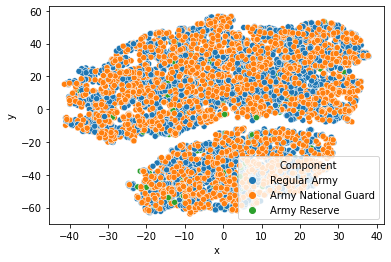

In [70]:
df['x']=tsne_features[:,0]
df['y']=tsne_features[:,1]
sns.scatterplot(x = 'x', y = 'y', hue = "Component", data = df)

* Colorea los puntos del gráfico de dispersión por 'Branch' 

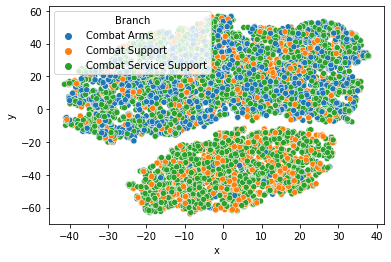

In [72]:
df['x']=tsne_features[:,0]
df['y']=tsne_features[:,1]
sns.scatterplot(x = 'x', y = 'y', hue = "Branch", data = df)

* Colorea los puntos del gráfico de dispersión por 'Gender' 

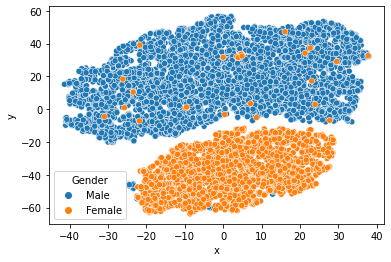

In [73]:
df['x']=tsne_features[:,0]
df['y']=tsne_features[:,1]
sns.scatterplot(x = 'x', y = 'y', hue = "Gender", data = df)